In [3]:
#Import required packages
import pandas as pd
import numpy as np

In [4]:
movie=pd.read_csv("/Users/chiranjibighimire/Desktop/movie_metadata.csv")
print(movie.columns.values)
print(movie.shape)


['color' 'director_name' 'num_critic_for_reviews' 'duration'
 'director_facebook_likes' 'actor_3_facebook_likes' 'actor_2_name'
 'actor_1_facebook_likes' 'gross' 'genres' 'actor_1_name' 'movie_title'
 'num_voted_users' 'cast_total_facebook_likes' 'actor_3_name'
 'facenumber_in_poster' 'plot_keywords' 'movie_imdb_link'
 'num_user_for_reviews' 'language' 'country' 'content_rating' 'budget'
 'title_year' 'actor_2_facebook_likes' 'imdb_score' 'aspect_ratio'
 'movie_facebook_likes']
(5043, 28)


#### The data set has  5043 rows and 28 columns


In [5]:
# Remove columns which are not related to the rating of movie
movie.drop(["aspect_ratio", "movie_imdb_link"], inplace=True, axis=1)
print(movie.shape)

(5043, 26)


#### I removed two columns which are not related to predicting IMDB rating

In [6]:
# Distinguish numeric, non-numeric, and string features from data set

numeric_features=movie._get_numeric_data().columns.values.tolist()
print("numeric features are:", numeric_features)


text_features=movie.columns.values.tolist()
text_features=[i for i in text_features if i not in numeric_features]

print("text features are:", text_features)


string_features=["movie_title", "plot_keywords"]

print("string features are:", string_features)

categorical_features=[i for i in text_features if i not in string_features]

print("categorical features are:", categorical_features)

numeric_features.remove("title_year") 
categorical_features.append("title_year")


numeric features are: ['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster', 'num_user_for_reviews', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'movie_facebook_likes']
text features are: ['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name', 'movie_title', 'actor_3_name', 'plot_keywords', 'language', 'country', 'content_rating']
string features are: ['movie_title', 'plot_keywords']
categorical features are: ['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name', 'actor_3_name', 'language', 'country', 'content_rating']


## Data Exploration

In [7]:
#find columns that have missing values
movie.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
movie_facebook_likes           0
dtype: int64

#### This data set has lot of missing values. We need to handle with missing values to get more accurate prediction.


#### There are few methods to handle the missing values. 1) remove rows with missing values 2) Replace missing values (Imputer method). I am using 1st method. 

In [8]:
#rows where the color is missing
missing_color = movie.loc[movie['color'].isnull()]
missing_color.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,plot_keywords,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,0
279,NaN,Christopher Barnard,NaN,22.0,0.0,NaN,NaN,5.0,NaN,Comedy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.2,0
459,NaN,NaN,95.0,54.0,NaN,0.0,Royce Johnson,577.0,NaN,Action|Adventure|Crime|Drama|Sci-Fi|Thriller,...,corruption|lawyer|partnership|superhero|vigilante,394.0,English,USA,TV-MA,NaN,NaN,4.0,8.8,55000
1948,NaN,Lasse Hallström,162.0,108.0,529.0,690.0,Henry Thomas,17000.0,80014842.0,Drama|Romance|War,...,army|coin collector|love|surfboard|u.s. army,186.0,English,USA,PG-13,25000000.0,2010.0,861.0,6.3,14000
2015,NaN,Mario Van Peebles,7.0,100.0,535.0,399.0,Mario Van Peebles,668.0,NaN,Action|Thriller,...,exploding airplane|fighter pilot|hands tied|he...,11.0,English,USA,PG-13,25000000.0,2014.0,535.0,4.1,437


In [9]:
#Remove all rows with missing values
movie.dropna(inplace=True)

print(movie.shape)


(3804, 26)


#### We narrow down the data from 5043 to 3804. Now we have clean data set.

In [10]:
#import numpy as np
#import sklearn.preprocessing 
#from sklearn import preprocessing
#from sklearn import preprocessing
#from sklearn.preprocessing import Imputer
# fill missing values with mean column values
#imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
#imp=imp.fit(movie)
#transformed_values = imputer.fit_transform(movie.values)
# count the number of NaN values in each column
#print(numpy.isnan(transformed_values).sum())


### Data Visualization

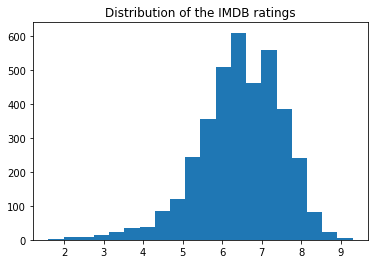

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
font = {'fontname':'Arial', 'size':'14'}
title_font = { 'weight' : 'bold','size':'16'}
plt.hist(movie.imdb_score, bins=20)
plt.title("Distribution of the IMDB ratings")
plt.show()

#### Lets make some scatter plots to see how IMDB score correlate with other variables.  

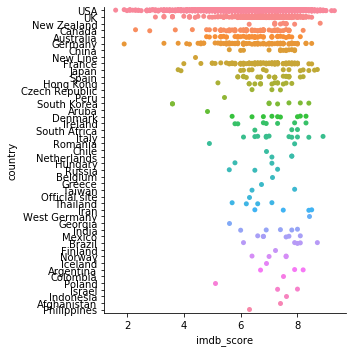

In [12]:
#make a scatterplot of imdb_score Vs country
import seaborn as sns
sns.catplot(x='imdb_score', y='country', data=movie)

#### It seems like US ans UK produce more movies, including large number of bad movies(low imdb score). 

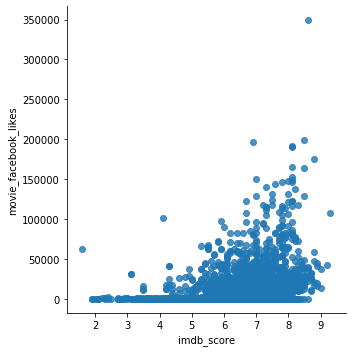

In [13]:
#make a scatterplot of imdb_score Vs movie facebook popularity

sns.lmplot(x='imdb_score', y='movie_facebook_likes', data=movie, 
           fit_reg=False) #remove regression line

#### The social media would be the good place to estimate the popularity of movies. From the scatter plot above, we can find that the movies that have high facebook likes tend to be the ones that have IMDB scores around 7.0 to 8.0. It is interesting to see that the greatest movie, with IMDB score  around 9.0, do not have more facebook popularity. 

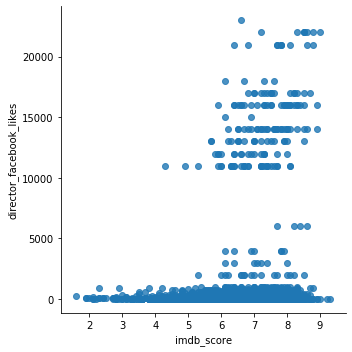

In [14]:
#make a scatterplot of imdb_score Vs director facebook popularity

sns.lmplot(x='imdb_score', y='director_facebook_likes', data=movie, 
           fit_reg=False) #remove regression line
        

#### Above plot shows that the directors who directed movies of IMDB score higher than 6.0 tend to have more facebook popularity than the rating lower than 6.0.

## Correlation Analysis

In [15]:
movie.corr().round(2)


,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
num_critic_for_reviews,1.00,0.23,0.18,0.25,0.17,0.47,0.60,0.24,-0.03,0.57,0.11,0.41,0.26,0.35,0.70
duration,0.23,1.00,0.18,0.13,0.09,0.25,0.34,0.12,0.03,0.36,0.07,-0.13,0.13,0.36,0.22
director_facebook_likes,0.18,0.18,1.00,0.12,0.09,0.14,0.30,0.12,-0.05,0.22,0.02,-0.05,0.12,0.19,0.16
actor_3_facebook_likes,0.25,0.13,0.12,1.00,0.25,0.30,0.27,0.49,0.11,0.21,0.04,0.12,0.55,0.07,0.27
actor_1_facebook_likes,0.17,0.09,0.09,0.25,1.00,0.15,0.18,0.94,0.06,0.12,0.02,0.10,0.39,0.09,0.13
gross,0.47,0.25,0.14,0.30,0.15,1.00,0.63,0.24,-0.03,0.55,0.10,0.05,0.25,0.21,0.37
num_voted_users,0.60,0.34,0.30,0.27,0.18,0.63,1.00,0.25,-0.03,0.78,0.07,0.02,0.25,0.48,0.52
cast_total_facebook_likes,0.24,0.12,0.12,0.49,0.94,0.24,0.25,1.00,0.08,0.18,0.03,0.13,0.64,0.11,0.21
facenumber_in_poster,-0.03,0.03,-0.05,0.11,0.06,-0.03,-0.03,0.08,1.00,-0.08,-0.02,0.07,0.07,-0.06,0.02
num_user_for_reviews,0.57,0.36,0.22,0.21,0.12,0.55,0.78,0.18,-0.08,1.00,0.07,0.02,0.19,0.32,0.37


### Heat map for correlation of numeric features

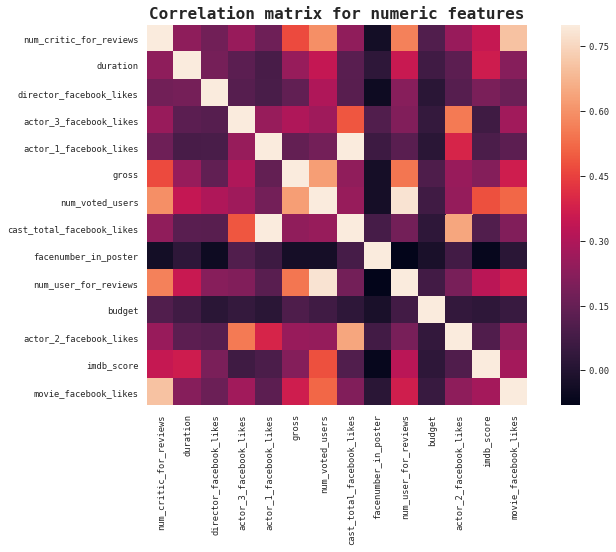

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
def corrmap(features, title):
    sns.set(context="paper", font="monospace")
    corrmat = movie[features].corr()
    f, ax = plt.subplots(figsize=(12, 7))
    plt.title(title, **title_font)
# Draw the heatmap using seaborn
    sns.heatmap(corrmat, vmax=.8, square=True)
corrmap(numeric_features,"Correlation matrix for numeric features")

#### - The "cast_total_facebook_likes" has a strong positive correlation with the "actor_1_facebook_likes", and has smaller positive correlation with both "actor_2_facebook_likes" and "actor_3_facebook_likes".
#### - The "movie_facebook_likes" has strong correlation with "num_critic_for_reviews", that means the popularity of a movie in social network can be affected by the critics.
#### - The "movie_facebook_likes" has relatively large correlation with the "num_voted_users".
#### - The movie "gross" has strong positive correlation with the "num_voted_users".

## Data Modeling

## Linear Regression model

In [17]:
# Feature Selection- delete string columns 
x=movie.drop(['imdb_score', 'num_critic_for_reviews','budget','cast_total_facebook_likes','num_voted_users','movie_facebook_likes', 'color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name', 'movie_title', 'actor_3_name', 'plot_keywords', 'language', 'country', 'content_rating'], axis=1)
y=movie.imdb_score

In [18]:
#Splitting the data into Training and Test set
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.30)
print (X_train.shape) 
print (y_train.shape) 
print (X_test.shape) 
print (y_test.shape)

(2662, 9)
(2662,)
(1142, 9)
(1142,)


In [19]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
model=sm.OLS(y_train,X_train)
results=model.fit()
print (results.summary())

                                 OLS Regression Results                                
Dep. Variable:             imdb_score   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                          1.389e+04
Date:                Fri, 10 Jan 2020   Prob (F-statistic):                        0.00
Time:                        16:03:34   Log-Likelihood:                         -3624.5
No. Observations:                2662   AIC:                                      7267.
Df Residuals:                    2653   BIC:                                      7320.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [20]:
### High p value are less significant--we can also drop these variables (columns)

In [21]:
#Calculating difference between Predicted and Actual Ratings

pred=results.predict(X_test)

h=pd.DataFrame(pred)
h=h.round(1)
g=pd.DataFrame(y_test)
g=g.reset_index(drop=True)
h['imdb_rating']=g
h.columns=['pred','actual']
h['difference']=round(abs(h.pred-h.actual),2)
h[:1]

,pred,actual,difference
3144,6.5,NaN,NaN


In [22]:
#Optimizing model to achieve a mean score of difference variable close to 0.5

round(h.difference.mean(),4)

0.9509

In [23]:
print("Predictions within +/-1.0 star: %f"%((h.difference<1.1).sum()))
print('Total Predictions:              %f'%(h.difference).count())
print ('Accuracy for Linear Regression: %f'%(((h.difference<1.1).sum())/(h.difference.count())))

Predictions within +/-1.0 star: 223.000000
Total Predictions:              338.000000
Accuracy for Linear Regression: 0.659763


#### The accuracy for linear regression model is 66%.Which is very bad model to predict imdb rating!

## KNN Model

In [24]:
# Feature selection - only choose important and numerical columns
feature_cols=['imdb_score','duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster', 'num_user_for_reviews', 'budget', 'title_year', 'actor_2_facebook_likes', 'movie_facebook_likes']
movie_num=movie[feature_cols]
movie_num.head

<bound method NDFrame.head of       imdb_score  duration  director_facebook_likes  actor_3_facebook_likes  \
0            7.9     178.0                      0.0                   855.0   
1            7.1     169.0                    563.0                  1000.0   
2            6.8     148.0                      0.0                   161.0   
3            8.5     164.0                  22000.0                 23000.0   
5            6.6     132.0                    475.0                   530.0   
...          ...       ...                      ...                     ...   
5033         7.0      77.0                    291.0                     8.0   
5034         6.3      80.0                      0.0                     0.0   
5035         6.9      81.0                      0.0                     6.0   
5037         6.4      95.0                      0.0                   133.0   
5042         6.6      90.0                     16.0                    16.0   

      actor_1_faceboo

In [25]:
#Binning 'imdb_score' variable into groups

h=movie_num
bins=[0.0,3.0,5.0,7.5,10.0]
groups=['D','C','B','A']
h['categories']=pd.cut(h.imdb_score,bins,labels=groups)

a=h.drop(['imdb_score','categories'], axis=1)
b=h.categories


<ipython-input-25-e82774a8e007>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h['categories']=pd.cut(h.imdb_score,bins,labels=groups)


In [26]:
#Splitting data into Training and Testing set

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(a,b,test_size=0.30)
print (X_train.shape) 
print (y_train.shape) 
print (X_test.shape) 
print (y_test.shape)

(2662, 13)
(2662,)
(1142, 13)
(1142,)


In [27]:
# Before making any actual predictions, it is always a good practice to scale the features so that all of them 
#can be uniformly evaluated.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Text(0, 0.5, 'Accuracy')

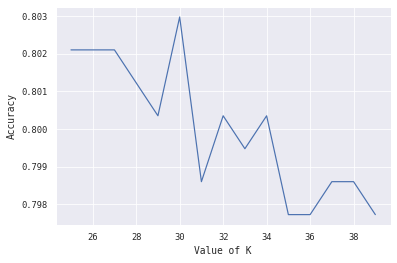

In [28]:
#Cross Validating model performance for range of 'K' neighbours

k_range=range(25,40)
k_scores=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred=knn.predict(X_test)
    z=metrics.accuracy_score(y_test,pred)
    k_scores.append(z)

plt.plot(k_range,k_scores)
plt.xlabel('Value of K')
plt.ylabel('Accuracy')

In [29]:
k_scores=pd.DataFrame(k_scores)
print('Maximum Accuracy for KNN: %f'%k_scores.max())

Maximum Accuracy for KNN: 0.802977


#### The KNN model gives 81% of accuracy. Which is not bad model to predict imdb rating. 

## Random Forest Model

In [30]:
X1 = movie_num.drop(['imdb_score','categories'],axis=1)
Y1 = movie_num.imdb_score
X1.head()

,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,movie_facebook_likes
0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,33000
1,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,0
2,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,85000
3,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,164000
5,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,24000


In [31]:
labels= np.array(movie_num['imdb_score'])
features= movie_num.drop(['imdb_score','categories'], axis = 1)
features = np.array(features)

In [32]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(features,labels,test_size=0.3)


In [33]:
#from sklearn.ensemble import RandomForestClassifier
#model = RandomForestClassifier(n_estimators=20)
#model.fit(X1_train, Y1_train)

In [34]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 20, random_state = 0)

In [35]:
# Train the model on training data
rf.fit(X1_train, Y1_train);

#### Our model has now been trained to learn the relationships between the features and the targets. The next step is figuring out how good the model is! To do this we make predictions on the test features. We then compare the predictions to the known answers.

In [36]:
# Use the forest's predict method on the test data
predictions = rf.predict(X1_test)
predictions
# Calculate the absolute errors
errors = abs(predictions - Y1_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


Mean Absolute Error: 0.54 degrees.


#### To put our predictions in perspective, we can calculate an accuracy using the mean average percentage error subtracted from 100%.

In [37]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y1_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 90.17 %.


#### That looks pretty good! Our model has learned how to predict the imdb rating with 90% accuracy.

#### By comparing the results, I would suggest Random Forest Model could be useful to deploy into production.